## EWMA Charts (Ch 12)

# Sample EWMA Chart

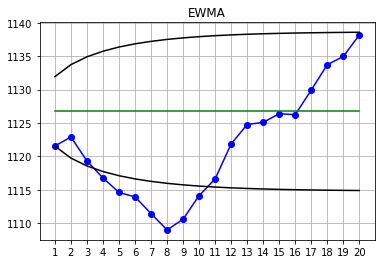

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
url='https://raw.githubusercontent.com/APS1040/Ch-12/main/ch_12.csv'
df = pd.read_csv(url)
Rs = []
Rs.append(0) # set first entry to 0 so the indices do not mix later
for i in range(1,20):
    R = np.abs(df['Weight'][i]-df['Weight'][i-1])
    Rs.append(R)
    i += 1
CL_R = np.sum(Rs)/19
CL_x_bar = df['Weight'].mean()
sigma = CL_R/1.128
mu = df['Weight'].mean()
lam = 0.1
L = 2.814
z = []
for i in range(0,20):
    if i==0:
        z.append(lam * df['Weight'][i] + (1-lam) * mu )
    else:
        z.append(lam * df['Weight'][i] + (1-lam) * z[i-1])
m=20
df['UCL'] = mu + L * sigma * np.sqrt((lam/(2-lam)) * (1-(1-lam)**(2*df['Observation'] )))
df['LCL'] = mu - L * sigma * np.sqrt((lam/(2-lam)) * (1-(1-lam)**(2*df['Observation'] )))
plt.plot(z,marker="o",color='b')
plt.plot(df['UCL'],color='k')
plt.plot(df['LCL'],color='k')
cl_line = np.full(m,mu) # create an array with all elements equal to the UCL
plt.plot(cl_line,color='g')
# These three lines help to set the labels of the x-axis to go from 1 to m
labels = list(range(1,m+1)) 
x = list(range(0,m)) 
plt.xticks(x,labels) 
plt.grid(True)
plt.title('EWMA')
plt.show()